In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy.io
from scipy import stats

### Read the dataset about health and filter it by USA

In [3]:
df = pd.read_csv("PLACES_Local_Data_for_Better_Health_County_Data_2022_release_20250320.csv")

df = df[df["Data_Value_Type"].str.contains("Crude", na=False)]


# Rename the city column
df = df.rename(columns={"LocationName": "city"})


# Drop unnecessary columns
df = df.drop(['StateAbbr', 'StateDesc', 'DataSource', 'Category', 'LocationID', 'CategoryID', 'DataValueTypeID', 'Geolocation', 'TotalPopulation', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Data_Value_Footnote_Symbol', 'MeasureId', 'Data_Value_Footnote' ], axis=1)
# First, let's identify the unique cities and measures
unique_cities = df['city'].unique()
unique_measures = df['Short_Question_Text'].unique()

print(f"Number of unique cities: {len(unique_cities)}")
print(f"Number of unique measures: {len(unique_measures)}")

# Create a pivot table with cities as index and measures as columns
new_df = df.pivot_table(
    index='city',
    columns='Measure',
    values='Data_Value',
    aggfunc='mean'  # Use mean if there are duplicate entries
)

# Reset the index to make 'city' a column again
new_df = new_df.reset_index()

new_df = new_df.drop(['Current lack of health insurance among adults aged 18-64 years',
'Cervical cancer screening among adult women aged 21-65 years',
'Visits to dentist or dental clinic among adults aged >=18 years',
 'Visits to doctor for routine checkup within the past year among adults aged >=18 years',
 'Mammography use among women aged 50-74 years',
 'Cholesterol screening among adults aged >=18 years',
 'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
 'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
], axis=1)

# All diseases
# list(df['Measure'].unique())


df.head()



Number of unique cities: 1841
Number of unique measures: 30


,Year,city,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Short_Question_Text
0,2020,NaN,Current lack of health insurance among adults ...,%,Crude prevalence,15.3,Health Insurance
1,2020,Talladega,Diagnosed diabetes among adults aged >=18 years,%,Crude prevalence,15.1,Diabetes
2,2020,Tallapoosa,Diagnosed diabetes among adults aged >=18 years,%,Crude prevalence,16.0,Diabetes
4,2020,Aleutians East,Cervical cancer screening among adult women ag...,%,Crude prevalence,68.3,Cervical Cancer Screening
5,2020,Anchorage,Depression among adults aged >=18 years,%,Crude prevalence,16.5,Depression


### Read the air quality dataset and clean the data

In [4]:
airdf = pd.read_excel("who_ambient_air_quality_database_version_2024_(v6.1).xlsx", sheet_name="Update 2024 (V6.1)")


# Filter by US
airdf = airdf[airdf["country_name"] == "United States of America"]

# Drop unnnecessary columns
airdf = airdf.drop(['country_name', 'version','reference','web_link', 'population_source','who_ms', 'type_of_stations', 'population', 'latitude', 'longitude', 'iso3', 'who_region', 'pm25_tempcov', 'pm10_tempcov','no2_tempcov'], axis=1)

# Remove state from city names
airdf['city'] = airdf['city'].str.split(' ').str[0]

# Leave only year 2020
airdf = airdf[airdf['year'] == 2019.0]


### Merge the datasets

In [109]:
merged_df = pd.merge(new_df, airdf, on='city', how='inner')
merged_df
print(merged_df.shape)
print(merged_df['pm10_concentration'].notna().sum())
print(merged_df['pm25_concentration'].notna().sum())
print(merged_df['no2_concentration'].notna().sum())
merged_df

(124, 26)
66
112
46


,city,All teeth lost among adults aged >=65 years,Arthritis among adults aged >=18 years,Binge drinking among adults aged >=18 years,Cancer (excluding skin cancer) among adults aged >=18 years,Chronic kidney disease among adults aged >=18 years,Chronic obstructive pulmonary disease among adults aged >=18 years,Coronary heart disease among adults aged >=18 years,Current asthma among adults aged >=18 years,Current smoking among adults aged >=18 years,...,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Sleeping less than 7 hours among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,year,pm10_concentration,pm25_concentration,no2_concentration
0,Albany,9.35,19.40,18.75,5.85,2.50,5.35,5.15,10.10,13.35,...,19.40,25.45,7.95,30.60,2.40,72.35,2019.0,NaN,9.30,NaN
1,Albany,9.35,19.40,18.75,5.85,2.50,5.35,5.15,10.10,13.35,...,19.40,25.45,7.95,30.60,2.40,72.35,2019.0,NaN,6.05,NaN
2,Alexandria,6.20,19.50,16.30,5.60,2.30,4.00,4.30,8.80,11.60,...,17.60,28.00,7.10,34.40,2.20,72.10,2019.0,NaN,7.50,NaN
3,Anchorage,9.50,20.30,20.00,5.70,2.40,4.60,4.90,9.20,15.70,...,19.30,28.50,8.30,30.90,2.50,64.00,2019.0,14.325,7.35,NaN
4,Athens,14.70,26.00,18.00,5.60,2.90,9.30,7.00,11.60,23.00,...,26.50,36.60,11.10,35.80,3.10,71.60,2019.0,NaN,9.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Worcester,9.40,29.75,14.55,8.25,3.20,6.90,7.35,9.95,14.35,...,23.85,30.85,9.35,30.80,3.30,78.10,2019.0,12.700,8.00,19.7
120,Yakima,13.50,24.20,13.80,6.00,3.50,7.50,7.10,11.20,17.00,...,25.50,36.60,12.90,31.10,3.60,66.40,2019.0,NaN,9.20,NaN
121,York,9.32,27.62,16.82,7.46,2.88,6.62,6.66,9.44,15.68,...,21.82,33.36,9.24,31.56,2.98,76.24,2019.0,NaN,8.80,13.8
122,Yuba,11.70,23.20,18.10,5.90,3.00,7.30,6.30,10.50,15.20,...,23.80,33.80,11.60,34.40,3.10,68.40,2019.0,NaN,8.40,12.2


Merged dataframe columns: ['city', 'All teeth lost among adults aged >=65 years', 'Arthritis among adults aged >=18 years', 'Binge drinking among adults aged >=18 years', 'Cancer (excluding skin cancer) among adults aged >=18 years', 'Chronic kidney disease among adults aged >=18 years', 'Chronic obstructive pulmonary disease among adults aged >=18 years', 'Coronary heart disease among adults aged >=18 years', 'Current asthma among adults aged >=18 years', 'Current smoking among adults aged >=18 years', 'Depression among adults aged >=18 years', 'Diagnosed diabetes among adults aged >=18 years', 'Fair or poor self-rated health status among adults aged >=18 years', 'High blood pressure among adults aged >=18 years', 'High cholesterol among adults aged >=18 years who have been screened in the past 5 years', 'Mental health not good for >=14 days among adults aged >=18 years', 'No leisure-time physical activity among adults aged >=18 years', 'Obesity among adults aged >=18 years', 'Physica

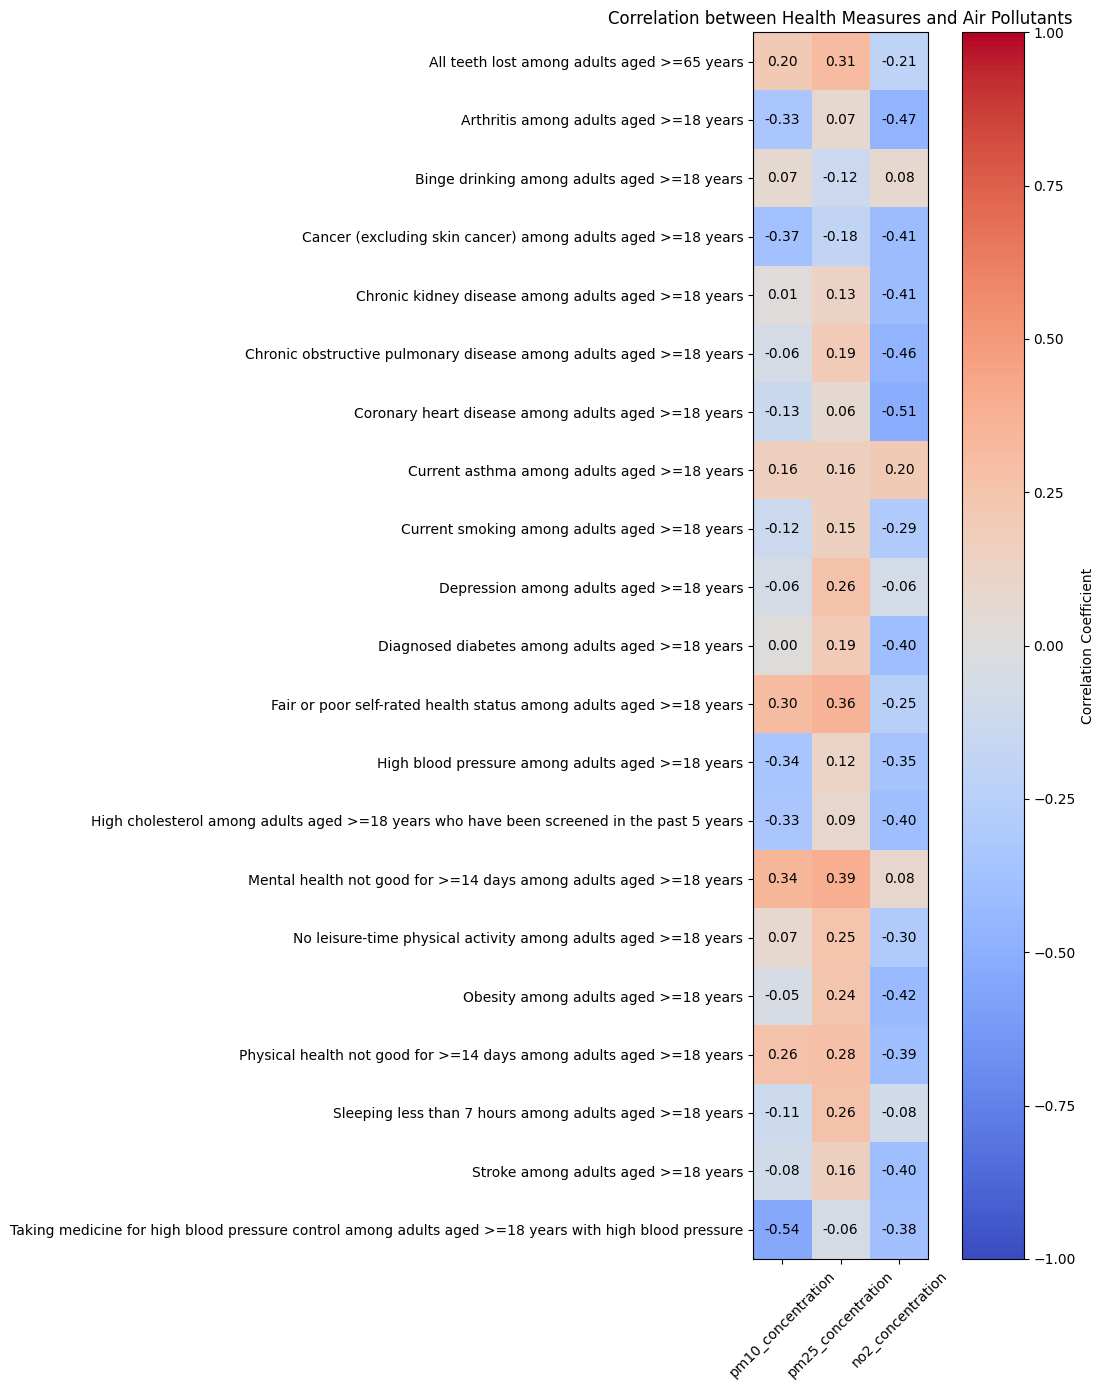

In [6]:
# Print all column names to identify the correct ones
print("Merged dataframe columns:", merged_df.columns.tolist())

# Update these with the ACTUAL column names from your print output
pollutants = ['pm10_concentration', 'pm25_concentration', 'no2_concentration']  # Use the correct names

# Get disease columns
disease_columns = [col for col in new_df.columns if col != 'city']

# Create a correlation matrix between pollutants and diseases
correlation_matrix = merged_df[pollutants + disease_columns].corr()

# Extract and transpose the correlation matrix - diseases as rows and pollutants as columns
disease_pollutant_corr = correlation_matrix.loc[disease_columns, pollutants]

# Display the correlation matrix
print("Correlation between health measures and air pollutants:")
disease_pollutant_corr

# Visualize the correlation matrix as a heatmap using matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 14))  # Adjusted for more rows than columns
im = plt.imshow(disease_pollutant_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient')

# Add labels and title
plt.title('Correlation between Health Measures and Air Pollutants')
plt.xticks(np.arange(len(pollutants)), pollutants, rotation=45)
plt.yticks(np.arange(len(disease_columns)), disease_columns)

# Add correlation values as text annotations
for i in range(len(disease_columns)):
    for j in range(len(pollutants)):
        text = plt.text(j, i, f'{disease_pollutant_corr.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black")

plt.tight_layout()
plt.savefig('corr.png')
plt.show()

In [ ]:
#This puts merged df into an array to use Scipy

array = merged_df.to_numpy()


print(array)
print(array.shape)

array[6,14]


[['Albany' 9.35 19.4 ... nan 9.3 nan]
 ['Albany' 9.35 19.4 ... nan 6.05 nan]
 ['Alexandria' 6.2 19.5 ... nan 7.5 nan]
 ...
 ['York' 9.32 27.619999999999997 ... nan 8.8 13.8]
 ['Yuba' 11.7 23.2 ... nan 8.4 12.2]
 ['Yuma' 12.7 25.549999999999997 ... 35.0 7.9 nan]]
(124, 26)


nan

In [182]:
#This is a test correlation for one disease 



X1=array[:,14]
Y=array[:,23]
 


x = X1.astype(float)
y = Y.astype(float)

mask = ~np.isnan(y)& ~np.isnan(x)

Y_filtered=y[mask]
X1_filtered=x[mask]

res = stats.pearsonr(X1_filtered, Y_filtered)

res




PearsonRResult(statistic=np.float64(-0.3289616780325027), pvalue=np.float64(0.0074590083287517095))

In [183]:
air_pollution_parameter = [23,24,25]
disease_range_start = 1
disease_range_end = 21

# Ensure Corr array matches the range
Corr = np.zeros((disease_range_end - disease_range_start + 1,len(air_pollution_parameter)))

# Extract air pollution parameter column
for j in range(0,len(air_pollution_parameter)):
    y = array[:, air_pollution_parameter[j]]

    for i in range(disease_range_start, disease_range_end + 1):
        try:
            # Extract disease column
            a = array[:, i]
            
            # Convert to float
            a_float = a.astype(float)
            y_float = y.astype(float)
            
            # Create mask for non-NaN values in BOTH columns
            mask =  ~np.isnan(y_float) & ~np.isnan(a_float) 
            
            # Filter both arrays
            y_filtered = y_float[mask]
            a_filtered = a_float[mask]
            
            # Compute Pearson correlation
            res = stats.pearsonr(a_filtered, y_filtered)
            
            
            Corr[i - disease_range_start,j] = res.pvalue
            
        except Exception as e:
            print(f"Error processing column {i}: {e}")

Corr


array([[1.11503168e-01, 9.29461526e-04, 1.65427168e-01],
       [6.79650437e-03, 4.58118368e-01, 1.10063275e-03],
       [5.94082882e-01, 2.07650160e-01, 6.18338743e-01],
       [1.95314291e-03, 5.61093583e-02, 4.97048023e-03],
       [9.49688373e-01, 1.69237290e-01, 4.49152705e-03],
       [6.22030623e-01, 3.96455566e-02, 1.14658637e-03],
       [2.96586772e-01, 5.58425520e-01, 2.88846310e-04],
       [1.90075506e-01, 9.33978072e-02, 1.78832936e-01],
       [3.29356159e-01, 1.14879388e-01, 4.89265980e-02],
       [6.25922242e-01, 5.00488295e-03, 6.68162916e-01],
       [9.91313467e-01, 3.95882670e-02, 6.33371349e-03],
       [1.31957127e-02, 1.22682195e-04, 9.93350090e-02],
       [6.16698184e-03, 2.12087381e-01, 1.74012805e-02],
       [7.45900833e-03, 3.42975034e-01, 7.10276392e-03],
       [5.68713236e-03, 2.72878654e-05, 5.82690937e-01],
       [5.51346362e-01, 7.98197009e-03, 4.48823950e-02],
       [7.02753146e-01, 1.21325662e-02, 3.30734111e-03],
       [3.37544217e-02, 2.79351

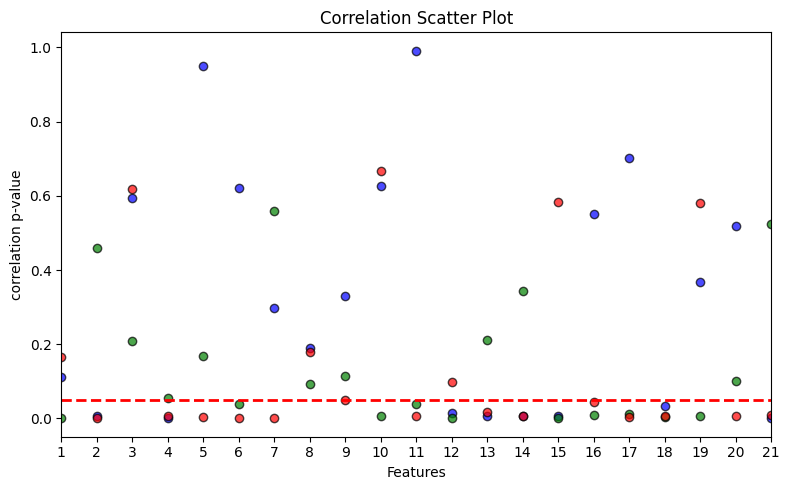

Length of Corr: 21
Length of features: 21


In [ ]:
#This creates a scatter plot of diseases and thier p-values


features = np.arange(1, len(Corr) + 1)

plt.figure(figsize=(8,5))
plt.scatter(features, Corr[:,0], color='blue', edgecolors='black', alpha=0.7)
plt.scatter(features, Corr[:,1], color='green', edgecolors='black', alpha=0.7)
plt.scatter(features, Corr[:,2], color='red', edgecolors='black', alpha=0.7)
# Red line at y=0.05
plt.axhline(y=0.05, color='red', linestyle='--', linewidth=2)

# Ensure x-axis starts at 1 and ends at the last feature
plt.xlim(1, len(Corr))

# Ensure x-ticks are exactly at each feature
plt.xticks(features)

# Optional: Add labels and title
plt.xlabel('Features')
plt.ylabel('correlation p-value')
plt.title('Correlation Scatter Plot')

plt.tight_layout()
plt.show()

# Verify lengths
print("Length of Corr:", len(Corr))
print("Length of features:", len(features))

(21, 3)
[[           nan 9.29461526e-04            nan]
 [6.79650437e-03            nan 1.10063275e-03]
 [           nan            nan            nan]
 [1.95314291e-03            nan 4.97048023e-03]
 [           nan            nan 4.49152705e-03]
 [           nan 3.96455566e-02 1.14658637e-03]
 [           nan            nan 2.88846310e-04]
 [           nan            nan            nan]
 [           nan            nan 4.89265980e-02]
 [           nan 5.00488295e-03            nan]
 [           nan 3.95882670e-02 6.33371349e-03]
 [1.31957127e-02 1.22682195e-04            nan]
 [6.16698184e-03            nan 1.74012805e-02]
 [7.45900833e-03            nan 7.10276392e-03]
 [5.68713236e-03 2.72878654e-05            nan]
 [           nan 7.98197009e-03 4.48823950e-02]
 [           nan 1.21325662e-02 3.30734111e-03]
 [3.37544217e-02 2.79351124e-03 7.26022580e-03]
 [           nan 5.50098160e-03            nan]
 [           nan            nan 6.18014151e-03]
 [2.81769583e-06            nan 

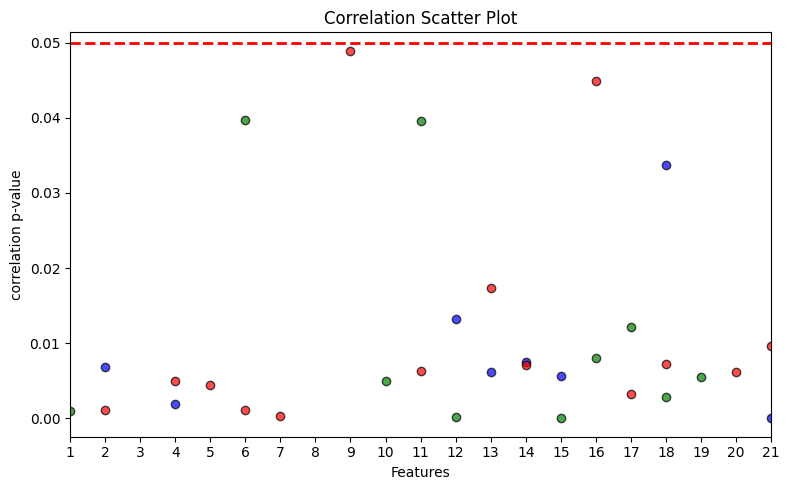

Length of Corr_significant: 21
Length of features: 21


In [185]:
#This filters the Corr matrix so that only statistically significant values (p<=0.05) remain
print(Corr.shape)

Corr_significat=Corr.copy() #if I dont use copy(), Corr also changes when I change Corr_significant
Corr_significat[Corr_significat > 0.05] = np.nan
print(Corr_significat)

#This creates a scatter plot with statistically significant values

features = np.arange(1, len(Corr_significat) + 1)

plt.figure(figsize=(8,5))
plt.scatter(features, Corr_significat[:,0], color='blue', edgecolors='black', alpha=0.7)
plt.scatter(features, Corr_significat[:,1], color='green', edgecolors='black', alpha=0.7)
plt.scatter(features, Corr_significat[:,2], color='red', edgecolors='black', alpha=0.7)
# Red line at y=0.05
plt.axhline(y=0.05, color='red', linestyle='--', linewidth=2)

# Ensure x-axis starts at 1 and ends at the last feature
plt.xlim(1, len(Corr))

# Ensure x-ticks are exactly at each feature
plt.xticks(features)

# Optional: Add labels and title
plt.xlabel('Features')
plt.ylabel('correlation p-value')
plt.title('Correlation Scatter Plot')

plt.tight_layout()
plt.show()

# Verify lengths
print("Length of Corr_significant:", len(Corr_significat))
print("Length of features:", len(features))

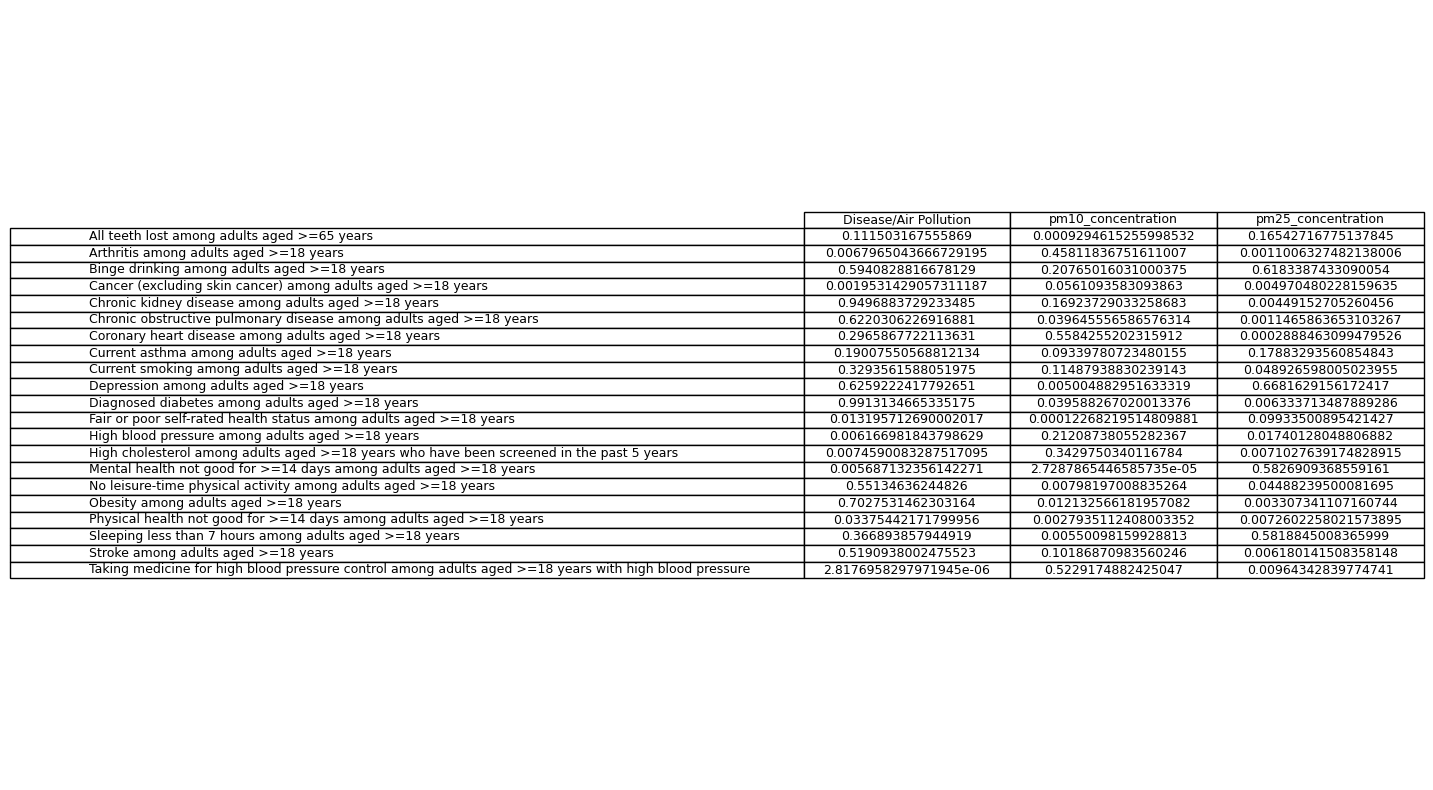

In [ ]:
correlation_df= pd.DataFrame(Corr, index=disease_columns, columns=pollutants)

fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('tight')
ax.axis('off')

ax.table(
    cellText=correlation_df.values, 
    colLabels=["Disease/Air Pollution"] + pollutants, 
    rowLabels=correlation_df.index, 
    cellLoc='center', 
    loc='center'
)
plt.show()
